### Импорт 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

### Задания:
1. Реализовать решение задачи классификации пользовательских данных с использованием деревьев решений. Сравнить с ранее применявшимися методами.
2. Реализовать решение задачи регрессии для пользовательских данных с использованием деревьев решений. Сравнить с ранее применявшимися методами.
3. Реализовать решение задачи заполнения пропусков с использованием деревьев решений. Сравнить с ранее применявшимися методами.
4. Самостоятельно программно реализовать по крайней мере один из алгоритмов построения деревьев решений (ID3, C4.5, C5.0, CART).

# №1

- Этот набор данных содержит информацию о сотрудниках компании, включая их образование, историю работы, демографические данные и факторы, связанные с трудоустройством. Задача классификации в том, уйдет ли сотрудник из компании или нет ?
- Ссылка на данные - https://clck.ru/36rUPf

In [2]:
employee = pd.read_csv('Employee.csv')

In [3]:
#Препроцессинг
employee.dropna()
employee.drop_duplicates(keep='first', inplace=True)
employee.rename(columns={'JoiningYear': 'Join', 'PaymentTier': 'Position', 
                         'EverBenched': 'UnemployedAtWork', 
                         'ExperienceInCurrentDomain': 'Experience'}, inplace=True)
dataset = employee[['Education', 'Join', 'City', 'Position', 'Age', 'Gender', 'UnemployedAtWork', 'Experience', 'LeaveOrNot']]

In [4]:
dataset.head(10)

,Education,Join,City,Position,Age,Gender,UnemployedAtWork,Experience,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [7]:
#Категориальные признаки
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
Lb = LabelEncoder()
dataset['labelEducation'] = Lb.fit_transform(dataset['Education'])
dataset['labelUnemployedAtWork'] = Lb.fit_transform(dataset['UnemployedAtWork'])
#Разделение на тренировочную и тестовую выборки
X = dataset[['labelEducation', 'Age', 'Join', 'Position', 'labelUnemployedAtWork', 'Experience']]
y = dataset['LeaveOrNot']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

<Axes: xlabel='Age', ylabel='Experience'>

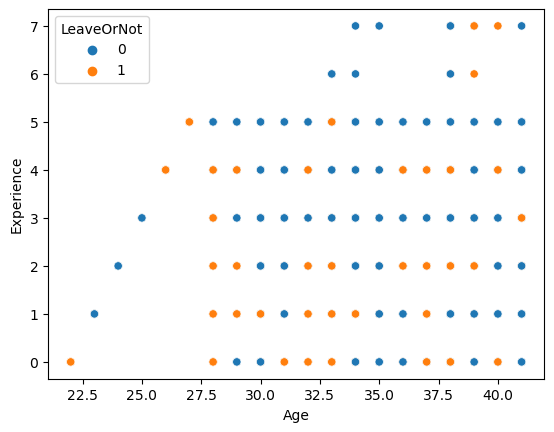

In [8]:
sns.scatterplot(dataset, x = 'Age', y = 'Experience', hue = 'LeaveOrNot')

In [9]:
#Пробуем дерево решений. 
#Дерево решений
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_impurity_decrease=0.05)
dt.fit(X_train,y_train)
dt_prediction = dt.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score

In [11]:
accuracy = accuracy_score(y_test, dt_prediction)
f1 = f1_score(y_test, dt_prediction)
compare = pd.DataFrame()
compare['Decision_tree'] = pd.Series(f1)

In [15]:
#LogRegression
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(C=1.0, penalty='l1', solver='liblinear', random_state=13)
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
compare['LogRegression'] = pd.Series(f1)

In [17]:
#SVM, KNN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#SVM
SVM = SVC(C=0.1)
SVM.fit(X_train, y_train)
preds = SVM.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
compare['SVM'] = pd.Series(f1)

In [19]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
preds1 = KNN.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, preds1)
f1 = f1_score(y_test, preds1)
compare['KNN'] = pd.Series(f1)

In [21]:
#RadiusKNN
from sklearn.neighbors import RadiusNeighborsClassifier
RadiusKNN = RadiusNeighborsClassifier(radius = 3)
RadiusKNN.fit(X_train, y_train)
preds2 = RadiusKNN.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, preds2)
f1 = f1_score(y_test, preds2)
compare['RadiusKNN'] = pd.Series(f1)

<Axes: >

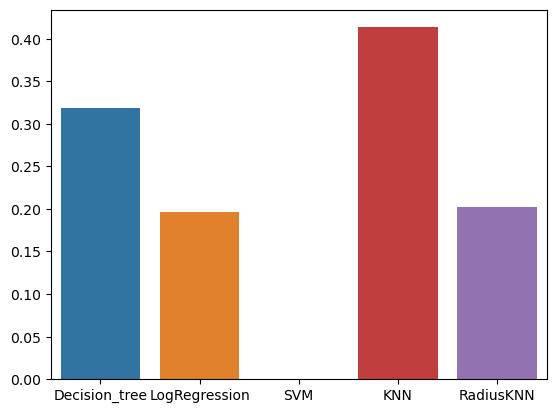

In [23]:
#Сравнение показателей
sns.barplot(compare, palette = 'dark')

#### Посмотрим, как разные алгоритмы относят элементы к классам

Text(0.5, 1.0, 'SVM')

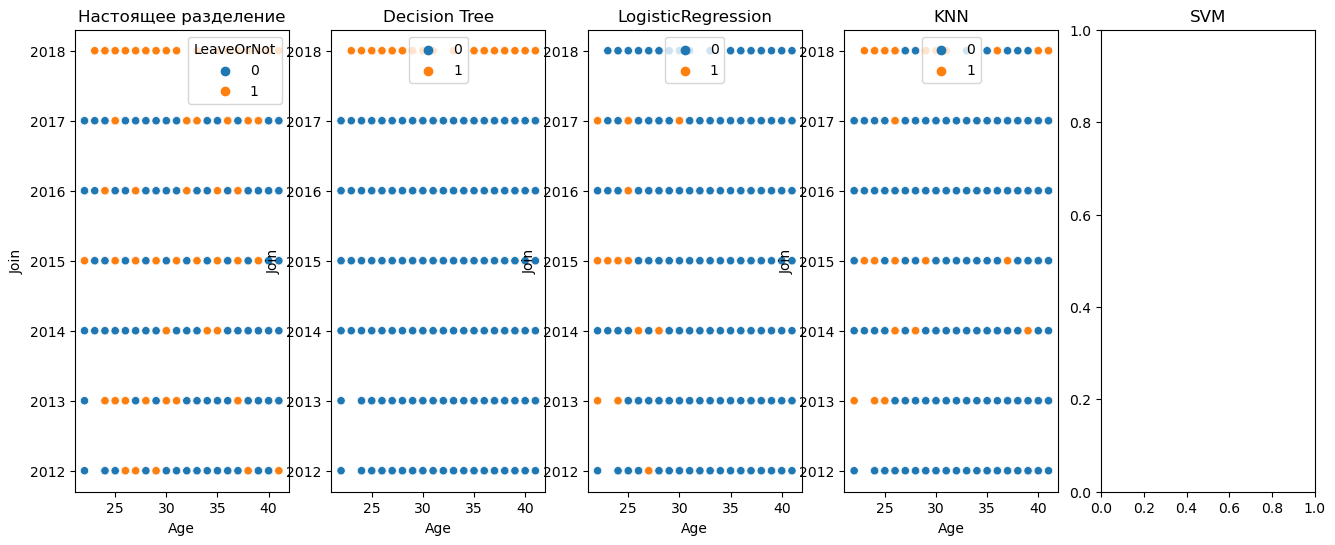

In [24]:
# x = 'Age', y = 'Experience', hue = 'LeaveOrNot'
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (16,6))

sns.scatterplot(data = X_test, x = 'Age', y = 'Join', hue = y_test, ax = axes[0])
sns.scatterplot(data = X_test, x = 'Age', y = 'Join', hue = dt_prediction, ax = axes[1])
sns.scatterplot(data = X_test, x = 'Age', y = 'Join', hue = y_pred, ax = axes[2])
sns.scatterplot(data = X_test, x = 'Age', y = 'Join', hue = preds1, ax = axes[3])


axes[0].set_title('Настоящее разделение')
axes[1].set_title('Decision Tree')
axes[2].set_title('LogisticRegression')
axes[3].set_title('KNN')
axes[4].set_title('SVM')


# 1.1 Попробуем на еще одном наборе данных

Это задача классификации. Кликнет ли пользователь на рекламу или нет. Ссылка на датасет - https://clck.ru/36rUxh

In [25]:
df = pd.read_csv('Advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


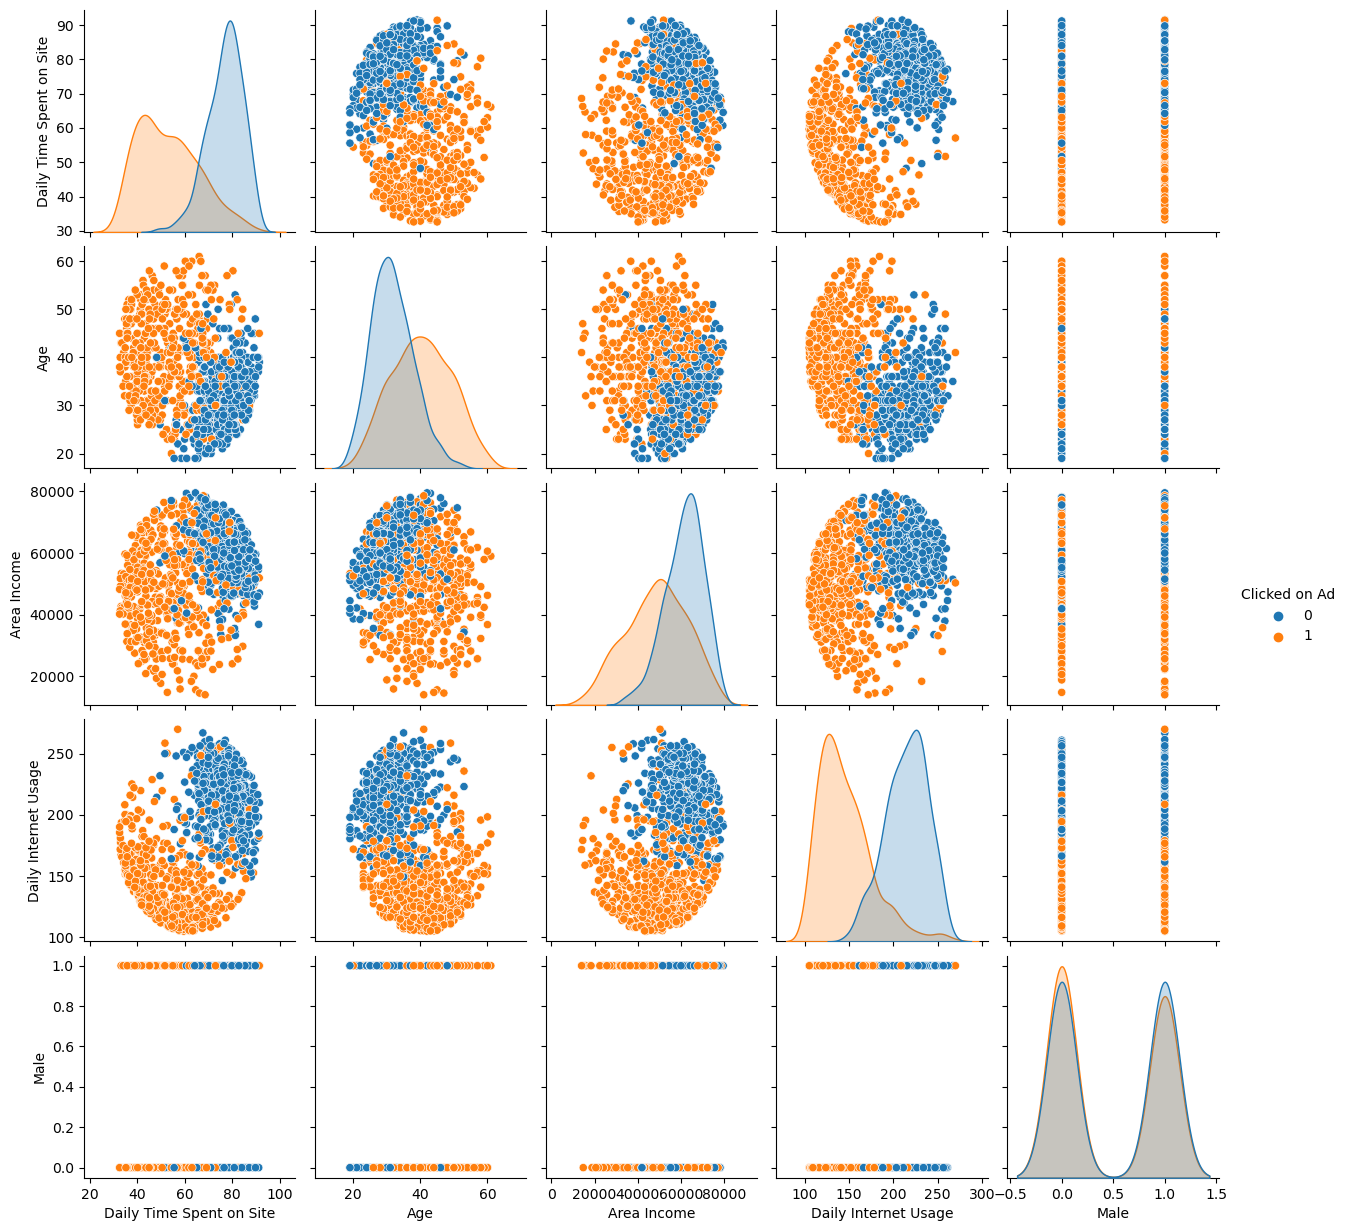

In [26]:
sns.pairplot(df, hue='Clicked on Ad')

In [27]:
## Предобработка
df_new = df.drop(['Ad Topic Line', 'City'], axis=1)
df_new['Timestamp'] = pd.to_datetime(df_new['Timestamp'])
df_new['Year'] = df_new['Timestamp'].dt.year
df_new['Month'] = df_new['Timestamp'].dt.month
df_new['Day'] = df_new['Timestamp'].dt.day_name()
df_new['Hour'] = df_new['Timestamp'].dt.hour
def extract_period(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_new['Period'] = df_new['Hour'].apply(extract_period)


In [28]:
#Попробуем DecisionTreeClassifier 
X = df_new[['Daily Time Spent on Site',  'Daily Internet Usage', 'Age']]
y = df_new['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
f1 = f1_score(y_test,tree_pred)
compare = pd.DataFrame()
compare['Tree'] = pd.Series(f1)

In [29]:
#Log регрессия
model = LogisticRegression()
model.fit(X_train, y_train)
logpred = model.predict(X_test)
f1 = f1_score(y_test,logpred)
compare['Log'] = pd.Series(f1)

In [30]:
#SVM
model = SVC()
model.fit(X_train, y_train)
SVM_pred = model.predict(X_test)
f1 = f1_score(y_test,SVM_pred)
compare['SVM'] = pd.Series(f1)

In [31]:
#KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_preds = KNN.predict(X_test)
f1 = f1_score(y_test,KNN_preds)
compare['KNN'] = pd.Series(f1)

<Axes: >

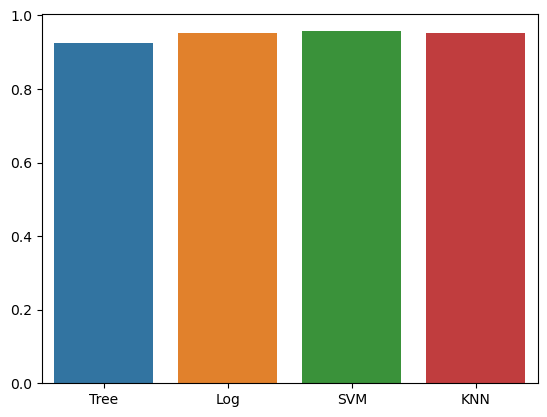

In [32]:
sns.barplot(compare, palette = 'colorblind')

In [33]:
X_test

,Daily Time Spent on Site,Daily Internet Usage,Age
545,42.60,168.29,55
298,80.39,214.74,31
109,74.02,210.54,32
837,55.77,117.33,49
194,77.20,254.05,33
...,...,...,...
68,75.74,215.25,25
449,77.69,169.88,22
715,49.19,123.08,38
793,36.62,162.44,32


Text(0.5, 1.0, 'KNN')

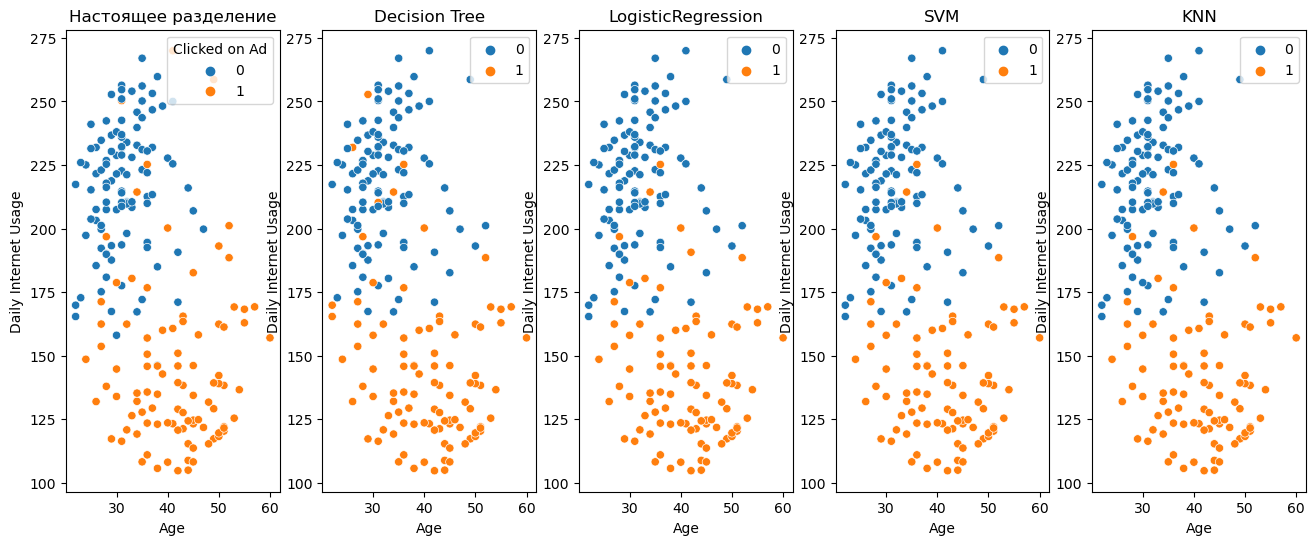

In [34]:
# x = 'Age', y = 'Experience', hue = 'LeaveOrNot'
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (16,6))

sns.scatterplot(data = X_test, x = 'Age', y = 'Daily Internet Usage', hue = y_test, ax = axes[0])
sns.scatterplot(data = X_test, x = 'Age', y = 'Daily Internet Usage', hue = tree_pred, ax = axes[1])
sns.scatterplot(data = X_test, x = 'Age', y = 'Daily Internet Usage', hue = logpred, ax = axes[2])
sns.scatterplot(data = X_test, x = 'Age', y = 'Daily Internet Usage', hue = SVM_pred, ax = axes[3])
sns.scatterplot(data = X_test, x = 'Age', y = 'Daily Internet Usage', hue = KNN_preds, ax = axes[4])


axes[0].set_title('Настоящее разделение')
axes[1].set_title('Decision Tree')
axes[2].set_title('LogisticRegression')
axes[3].set_title('SVM')
axes[4].set_title('KNN')


### Данные хорошо разделяются на классы всеми моделями. Лучшая модель - SVM. 

### №2. Решить задачу регрессии

##### О датасете:
- Этот набор данных был создан для изучения различных факторов, влияющих на производительность и удовлетворенность сотрудников в типичной организации. Он охватывает множество областей - от личной демографии до показателей эффективности и сведений о работе, предлагая всестороннее представление о динамике рабочего места.
- Ссылка - https://clck.ru/36rVE8

##### Задачу регрессии можно поставить как задачу о предсказании зарплаты сотрудника, которая его устроит.

In [35]:
df = pd.read_csv('hr_dashboard_data.csv')

#### Можно посмотреть на зависимость между сделанными проектами & зарплатой

<Axes: xlabel='Projects Completed', ylabel='Salary'>

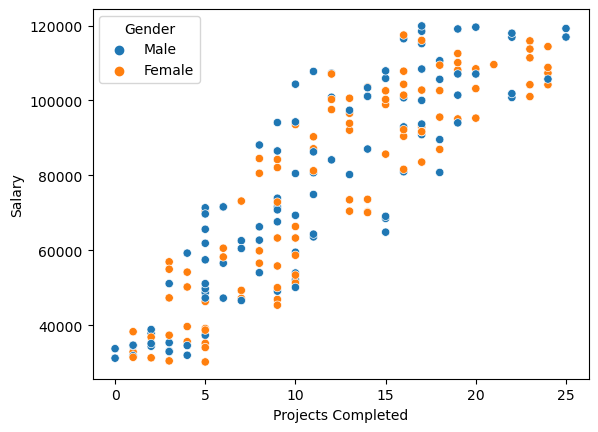

In [36]:
sns.scatterplot(df,x='Projects Completed' ,y='Salary',hue='Gender')

In [37]:
#Предобработка данных
#Категориальные переменные
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Joining Date']= label_encoder.fit_transform(df['Joining Date'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Department']= label_encoder.fit_transform(df['Department'])
df['Position']= label_encoder.fit_transform(df['Position'])
df = pd.get_dummies(df)
#Стандартизация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Salary']] = scaler.fit_transform(df[['Salary']])
#Разделение
X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [38]:
#Пробуем разные модели
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
lin_pred = model.predict(X_test)
mse = mean_squared_error(y_test, lin_pred)
compare = pd.DataFrame()
compare['LinearRegr'] = pd.Series(mse)

In [39]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, tree_pred)
compare['Tree'] = pd.Series(mse)

In [40]:
#SVR, KNN
# DecisionTree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, svr_pred)
compare['SVR'] = pd.Series(mse)

KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)
KNR_pred = KNR.predict(X_test)
mse = mean_squared_error(y_test,KNR_pred)
compare['KNR'] = pd.Series(mse)

In [41]:
#Построим еще LGBM

In [42]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators = 50, learning_rate = 1,num_leaves = 12,  max_depth = 5,reg_alpha = 3, verbosity=-1 )
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
compare['LGBM'] = pd.Series(mse)

In [43]:
# Посмотрим на результаты. Сравним разницу между тем, как модели строят предсказания

### Разница в MSE моделей

<Axes: >

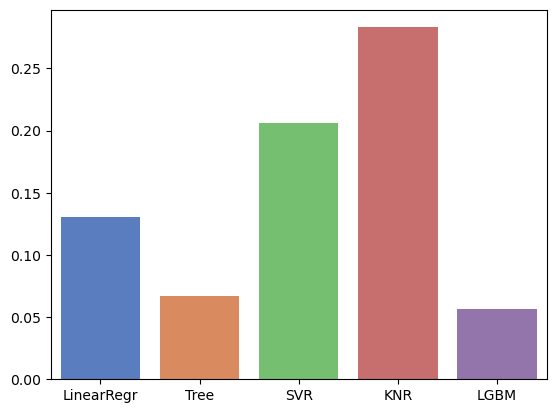

In [75]:
sns.barplot(compare, palette = 'muted')

Text(0.5, 0, 'Настоящая зарплата')

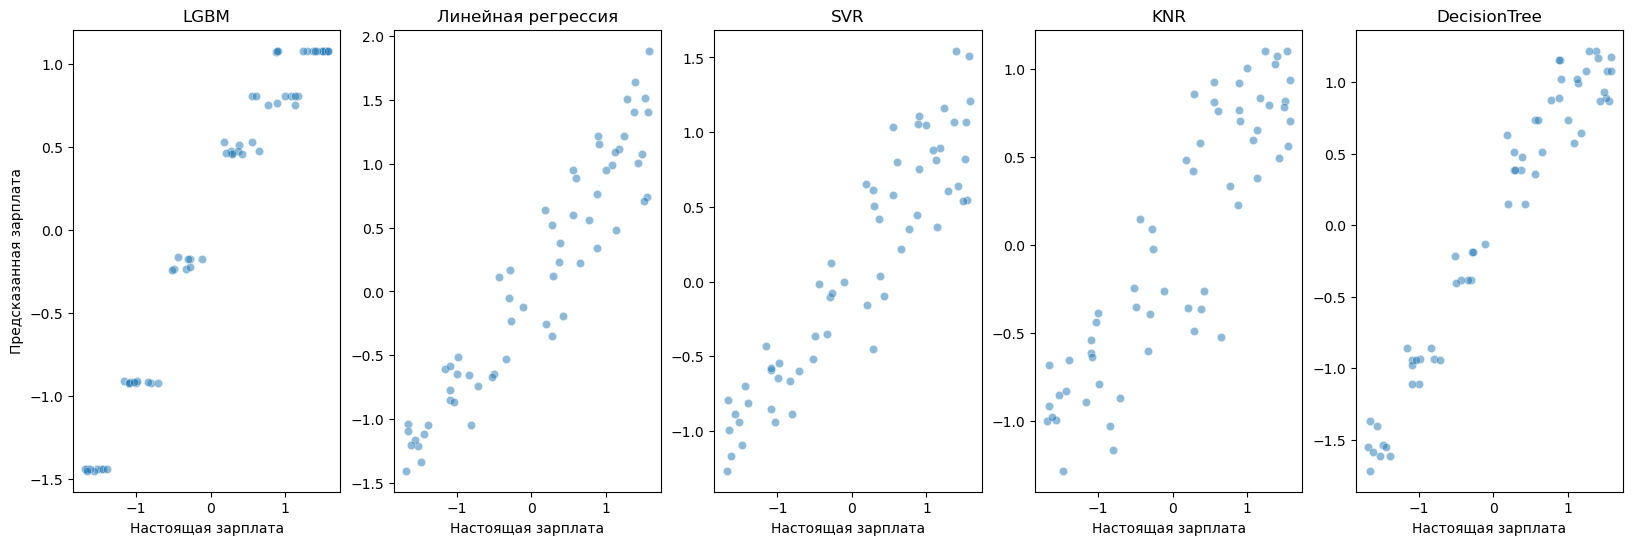

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (20,6))
sns.scatterplot(x=y_test, y=lgb_pred, alpha=0.5, ax = axes[0])
sns.scatterplot(x=y_test, y=lin_pred, alpha=0.5, ax = axes[1])
sns.scatterplot(x=y_test, y=svr_pred, alpha=0.5, ax = axes[2])
sns.scatterplot(x=y_test, y=KNR_pred, alpha=0.5, ax = axes[3])
sns.scatterplot(x=y_test, y=tree_pred, alpha=0.5, ax = axes[4])

axes[0].set_title('LGBM')
axes[0].set_xlabel('Настоящая зарплата')
axes[0].set_ylabel('Предсказанная зарплата')
axes[1].set_title('Линейная регрессия')
axes[1].set_xlabel('Настоящая зарплата')
axes[2].set_title('SVR')
axes[2].set_xlabel('Настоящая зарплата')
axes[3].set_title('KNR')
axes[3].set_xlabel('Настоящая зарплата')
axes[4].set_title('DecisionTree')
axes[4].set_xlabel('Настоящая зарплата')

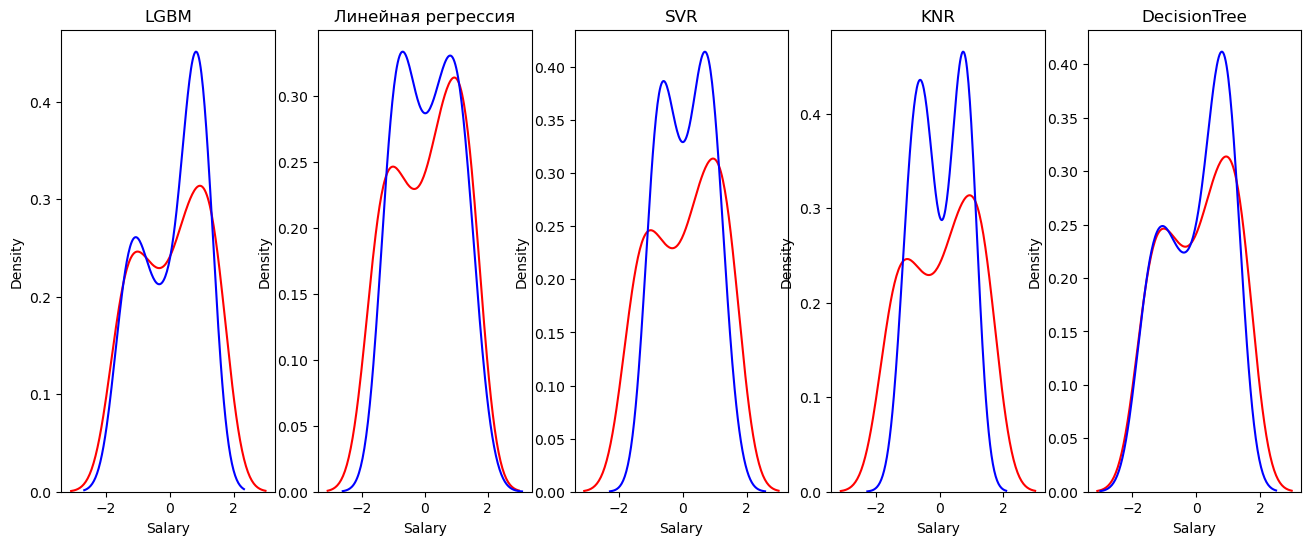

In [46]:
import warnings
warnings.filterwarnings("ignore")


fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (16,6))


sns.distplot(y_test, hist=False, color="r", label="Настоящая salary", ax=axes[0])
sns.distplot(lgb_pred, hist=False, color="b", label="Предсказанные значения" , ax=axes[0])

sns.distplot(y_test, hist=False, color="r", label="Настоящая salary", ax=axes[1])
sns.distplot(lin_pred, hist=False, color="b", label="Предсказанные значения" , ax=axes[1])

sns.distplot(y_test, hist=False, color="r", label="Настоящая salary", ax=axes[2])
sns.distplot(svr_pred, hist=False, color="b", label="Предсказанные значения" , ax=axes[2])

sns.distplot(y_test, hist=False, color="r", label="Настоящая salary", ax=axes[3])
sns.distplot(KNR_pred, hist=False, color="b", label="Предсказанные значения" , ax=axes[3])

sns.distplot(y_test, hist=False, color="r", label="Настоящая salary", ax=axes[4])
sns.distplot(tree_pred, hist=False, color="b", label="Предсказанные значения" , ax=axes[4])


plt.title('Настоящие vs Предсказанные значения для Salary')
axes[0].set_title('LGBM')
axes[1].set_title('Линейная регрессия')
axes[2].set_title('SVR')
axes[3].set_title('KNR')
axes[4].set_title('DecisionTree')


plt.show()
plt.close()

In [52]:
X_nums = X_test.select_dtypes(include = 'int')

In [54]:
X_nums.head(2)

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Department,Position,Joining Date
95,27,0,3,18,89,1,2,18
15,40,1,17,3,53,4,3,13


<Axes: >

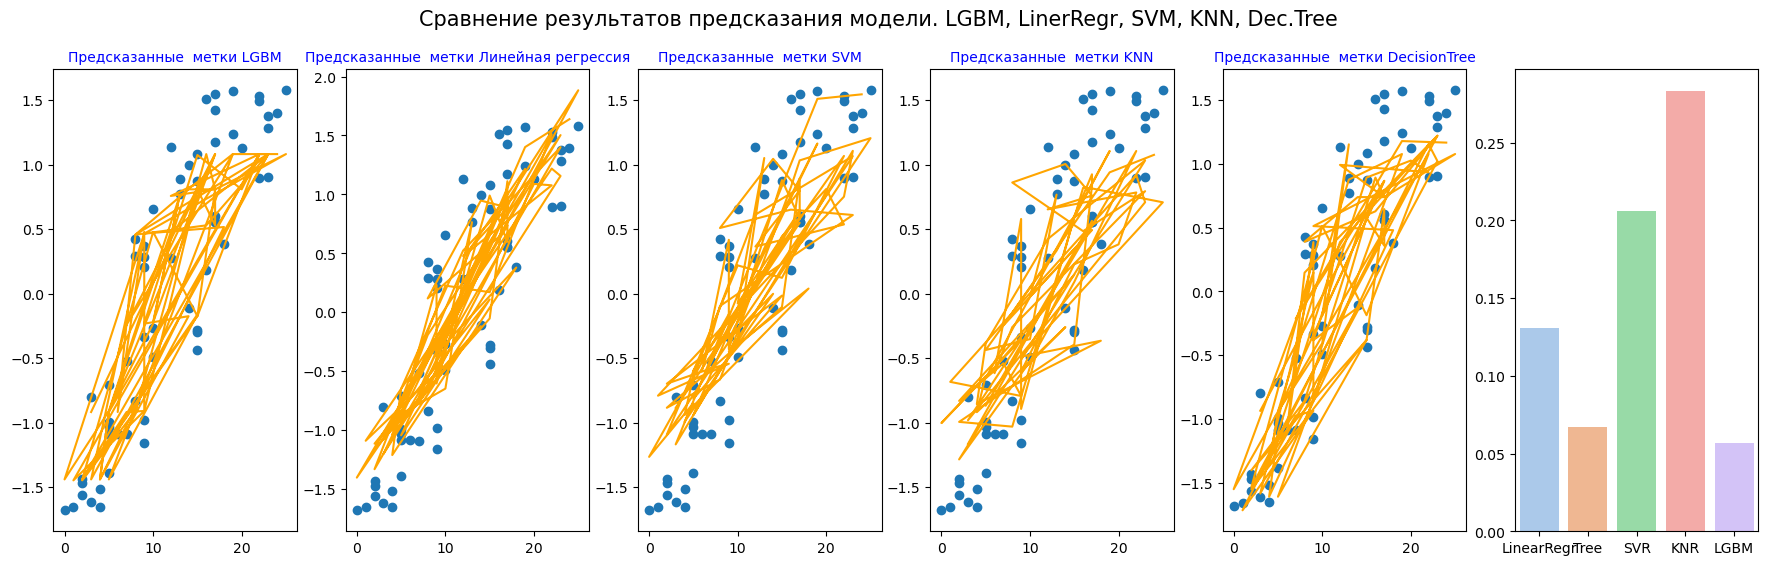

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(22, 6))
fig.suptitle(f'Сравнение результатов предсказания модели. LGBM, LinerRegr, SVM, KNN, Dec.Tree', size = 15)
axes[0].scatter(X_test['Projects Completed'], y_test)
axes[0].plot(X_test['Projects Completed'], lgb_pred, color = 'Orange')
axes[0].set_title('Предсказанные  метки LGBM', color = 'Blue', size = 10)

axes[1].scatter(X_test['Projects Completed'], y_test)
axes[1].plot(X_test['Projects Completed'], lin_pred, color = 'Orange')
axes[1].set_title('Предсказанные  метки Линейная регрессия', color = 'Blue', size = 10)

axes[2].scatter(X_test['Projects Completed'], y_test)
axes[2].plot(X_test['Projects Completed'], svr_pred, color = 'Orange')
axes[2].set_title('Предсказанные  метки SVM', color = 'Blue', size = 10)

axes[3].scatter(X_test['Projects Completed'], y_test)
axes[3].plot(X_test['Projects Completed'], KNR_pred, color = 'Orange')
axes[3].set_title('Предсказанные  метки KNN', color = 'Blue', size = 10)

axes[4].scatter(X_test['Projects Completed'], y_test)
axes[4].plot(X_test['Projects Completed'], tree_pred, color = 'Orange')
axes[4].set_title('Предсказанные  метки DecisionTree', color = 'Blue', size = 10)

sns.barplot(compare, ax=axes[5], palette = 'pastel')

### №3. Сделать вставку пропусков. Сравнить с другими моделями

Сделаем вставку пропусков для показателя salary. Будет такая же задача регрессии, но с предсказанием определенного участка таргетной переменной

Добавим пропуски к avg_price_per_room и будем пробовать их заполнять в рамках задачи регрессии

In [202]:
df = pd.read_csv('hr_dashboard_data.csv')

In [203]:
df['Salary']

0       63596
1      112540
2       66292
3       38303
4      101133
        ...  
195     50051
196     46612
197     32992
198    104216
199    104341
Name: Salary, Length: 200, dtype: int64

In [204]:
#Предобработка данных
#Категориальные переменные
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Joining Date']= label_encoder.fit_transform(df['Joining Date'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Department']= label_encoder.fit_transform(df['Department'])
df['Position']= label_encoder.fit_transform(df['Position'])
df = pd.get_dummies(df)

#### До создания пропусков:

<Axes: xlabel='Salary', ylabel='Density'>

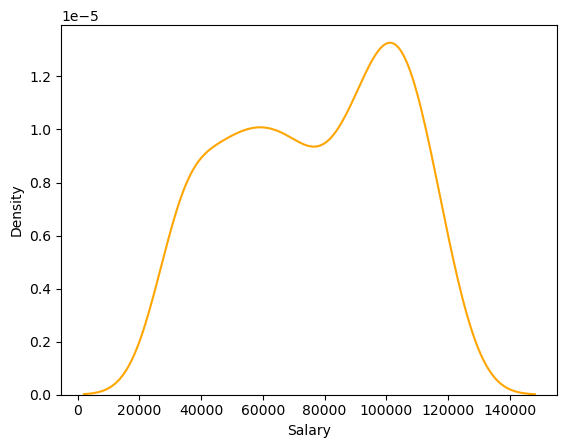

In [205]:
sns.kdeplot(df['Salary'], color = 'Orange')

<Axes: xlabel='Projects Completed', ylabel='Salary'>

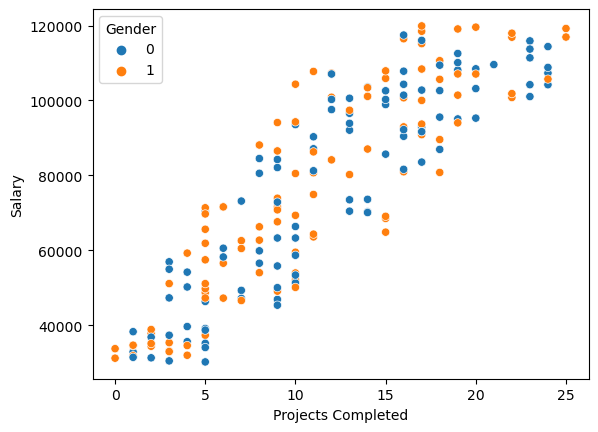

In [206]:
sns.scatterplot(df,x='Projects Completed' ,y='Salary',hue='Gender')

In [207]:
dist = np.arange(60000, 80000)
len(df.loc[df['Salary'].isin(dist) , 'Salary'])

33

#### Сделаем пропуски в промежутке [60k, 80k]

In [208]:
df_full = df.copy()
df.loc[df['Salary'].isin(dist) , 'Salary'] = np.nan

#### Посмотрим на пропуск визуально:

In [209]:
df_nan = df.copy()

Text(0.5, 1.0, 'После добавления пропусков')

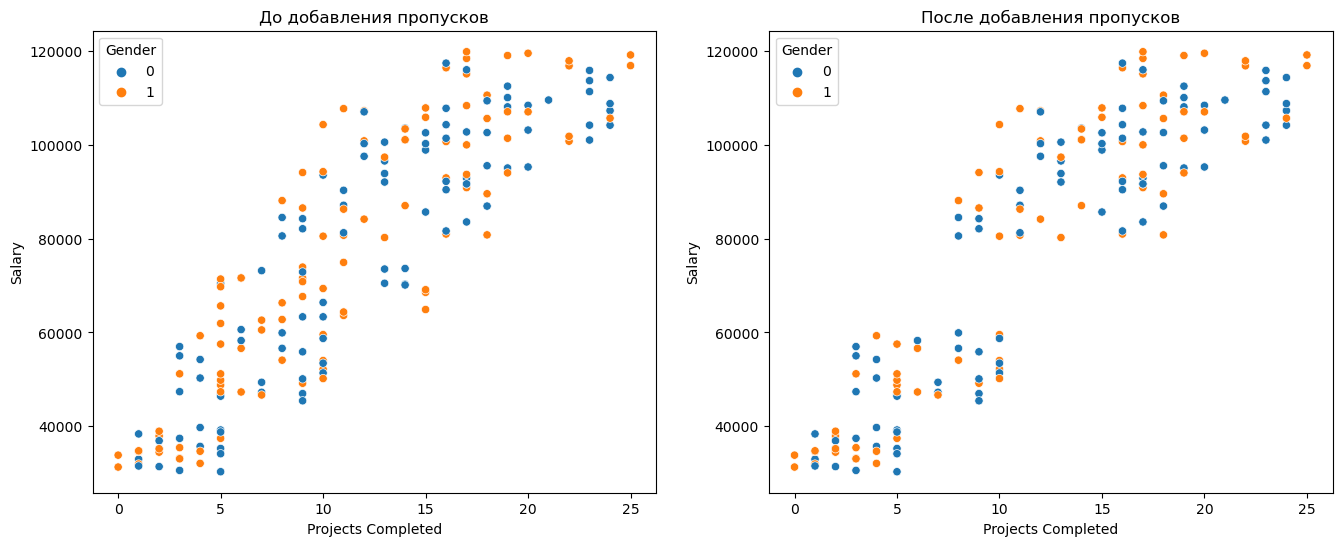

In [210]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
sns.scatterplot(df_full,x='Projects Completed' ,y='Salary',hue='Gender', ax = axes[0])
axes[0].set_title('До добавления пропусков')
sns.scatterplot(df,x='Projects Completed' ,y='Salary',hue='Gender', ax = axes[1])
axes[1].set_title('После добавления пропусков')

In [211]:
df_without_nan =  df.dropna(subset=['Salary'])
Xnew_n = df_without_nan.drop('Salary', axis = 1)
ynew_n = df_without_nan['Salary']

In [212]:
df['Salary'].isnull().sum()

33

In [213]:
X_test_NA = df_full.drop('Salary', axis = 1)
y_test_NA = df_full['Salary']

In [214]:
#Разделение
X_train, X_test, y_train, y_test = train_test_split(Xnew_n, ynew_n, train_size = 0.7, random_state = 42)

### KNN

In [292]:
### Попробуем разные модели: KNN, DecisionTree, LGBM, SVM, замена средним, замена медианой
#KNN imputer
from sklearn.impute import KNNImputer
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xnew_n, ynew_n)
KNN_pred = knn.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, KNN_pred))
knn_r_score = pd.Series(r2_score(y_test_NA, KNN_pred))

R^2 = 0.7874975752994997


#### Дерево решений

In [289]:
model = DecisionTreeRegressor()
model.fit(Xnew_n, ynew_n)
tree_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, tree_pred))
tree_pred_score = pd.Series(r2_score(y_test_NA, tree_pred))

R^2 = 0.7641034814741947


### Среднее

In [224]:
df['Salary'].isnull().sum()

33

In [225]:
df_mean = df.fillna(df['Salary'].mean())
print("R^2 =", r2_score(y_test_NA, df_mean['Salary']))
mn = r2_score(df_full['Salary'], df_mean['Salary'])
mn = pd.Series(mn)

R^2 = 0.9729927356030951


### Линейная регрессия

In [283]:
model = LinearRegression()
model.fit(Xnew_n, ynew_n)
lin_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, lin_pred))
lin_pred_score = pd.Series(r2_score(y_test_NA, lin_pred))

R^2 = 0.9042373693676087


###  LGBM

In [277]:
model = LGBMRegressor(n_estimators=100,max_depth = 3,num_leaves = 12, verbosity=-1, reg_lambda = 200, reg_alpha = 200)
model.fit(Xnew_n, ynew_n)
lgbm_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, lgbm_pred))
lgbm_pred_score = pd.Series(r2_score(y_test_NA, lgbm_pred))

R^2 = 0.8479177098978016


### RandomForest

In [285]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, max_depth=8)
model.fit(Xnew_n, ynew_n)
rf_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, rf_pred))
rf_pred_score = pd.Series(r2_score(y_test_NA, rf_pred))

R^2 = 0.7439395574088048


### Замена медианой

In [235]:
df_new = df.fillna(df['Salary'].median())
print("R^2 =", r2_score(y_test_NA, df_new['Salary']))
med = r2_score(y_test_NA, df_new['Salary'])
med = pd.Series(med)

R^2 = 0.9150825442544868


### Визуализируем показатели метрик + как модели заполняли пропуски

In [293]:
compare = pd.DataFrame()
compare['median'] = med
compare['RandomForest'] = rf_pred_score
compare['LGBM'] = lgbm_pred_score
compare['LinearRegression'] = lin_pred_score
compare['mean'] = mn
compare['KNN'] = knn_r_score
compare['tree'] = tree_pred_score

Text(0.5, 1.0, 'Сравнение моделей по ')

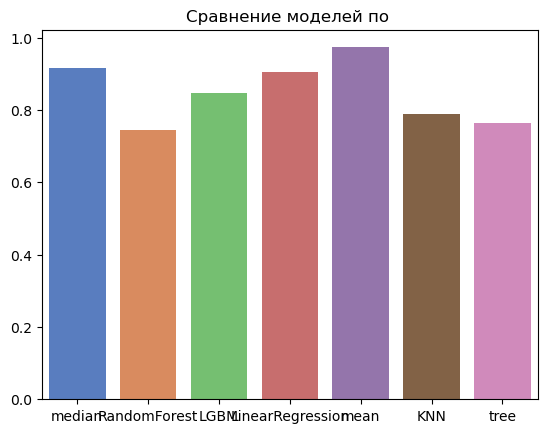

In [287]:
sns.barplot(compare, palette = 'muted')
plt.title('Сравнение моделей по ')

### Посмотрим на заполнение

In [258]:
X_test['Projects Completed'].head(1)

121    21
Name: Projects Completed, dtype: int64

Text(0.5, 1.0, 'Тестовая выборка')

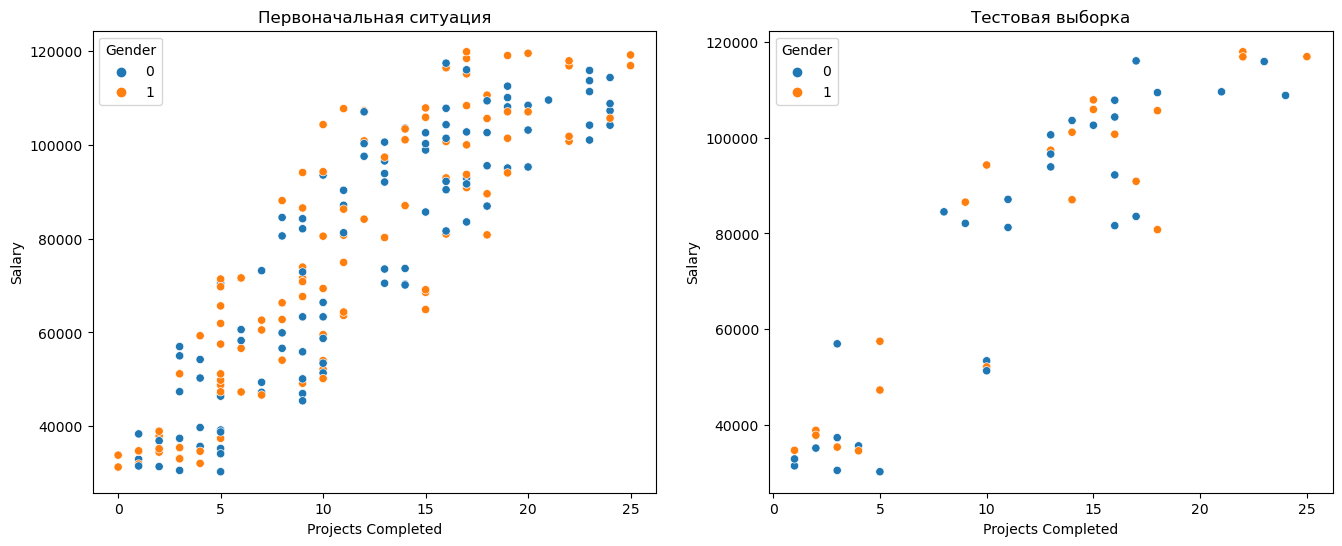

In [259]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
sns.scatterplot(df_full,x='Projects Completed' ,y='Salary',hue='Gender', ax = axes[0])
axes[0].set_title('Первоначальная ситуация')
sns.scatterplot(x = X_test['Projects Completed'],y=y_test,hue=X_test['Gender'], ax = axes[1])
axes[1].set_title('Тестовая выборка')

In [272]:
X_test_NA['Projects Completed'].shape

(200,)

Text(0.5, 1.0, 'RandomForest')

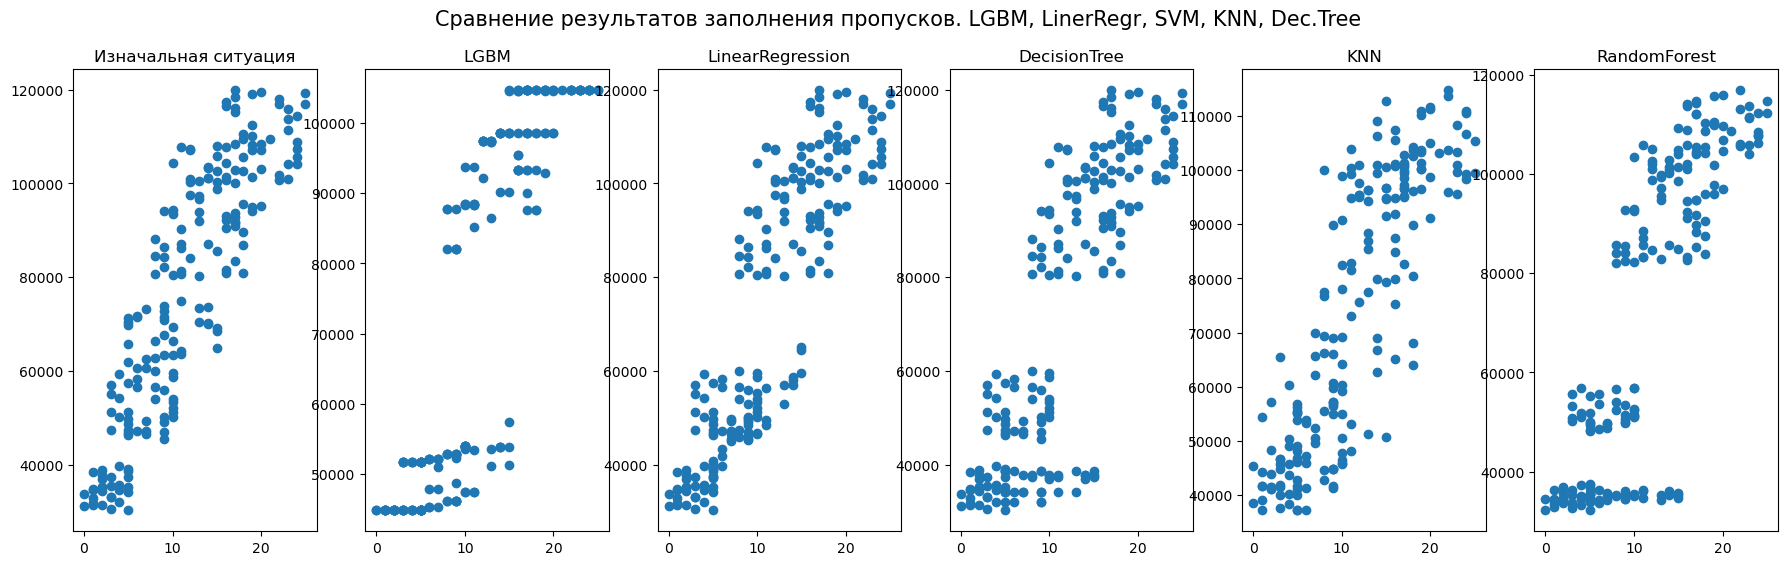

In [296]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(22, 6))
fig.suptitle(f'Сравнение результатов заполнения пропусков. LGBM, LinerRegr, SVM, KNN, Dec.Tree', size = 15)
axes[0].scatter(x = X_test_NA['Projects Completed'], y = y_test_NA)
axes[0].set_title('Изначальная ситуация')
axes[1].scatter(x = X_test_NA['Projects Completed'], y = lgbm_pred)
axes[1].set_title('LGBM')
axes[2].scatter(x = X_test_NA['Projects Completed'], y = lin_pred)
axes[2].set_title('LinearRegression')
axes[3].scatter(x = X_test_NA['Projects Completed'], y = tree_pred)
axes[3].set_title('DecisionTree')
axes[4].scatter(x = X_test_NA['Projects Completed'], y = KNN_pred)
axes[4].set_title('KNN')
axes[5].scatter(x = X_test_NA['Projects Completed'], y = rf_pred)
axes[5].set_title('RandomForest')

# axes[1].plot(X_test_NA['Projects Completed'], lgbm_pred, color = 'Orange')
# axes[1].set_title('Предсказанные  метки LGBM', color = 'Blue', size = 10)

# axes[1].scatter(X_test['Projects Completed'], y_test)
# axes[1].plot(X_test['Projects Completed'], lin_pred, color = 'Orange')
# axes[1].set_title('Предсказанные  метки Линейная регрессия', color = 'Blue', size = 10)

# axes[2].scatter(X_test['Projects Completed'], y_test)
# axes[2].plot(X_test['Projects Completed'], knn_r, color = 'Orange')
# axes[2].set_title('Предсказанные  метки KNN', color = 'Blue', size = 10)

# axes[3].scatter(X_test['Projects Completed'], y_test)
# axes[3].plot(X_test['Projects Completed'], tree_pred, color = 'Orange')
# axes[3].set_title('Предсказанные  метки DecisionTree', color = 'Blue', size = 10)

# sns.barplot(compare, ax=axes[5], palette = 'pastel')

#### Реализация дерева ID3

In [314]:
import random
import numpy as np

# Функция для вычисления энтропии
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Функция для вычисления прироста информации
def information_gain(data, split_attribute_name, target_name):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    information_gain_val = total_entropy - weighted_entropy
    return information_gain_val

# Рекурсивная функция построения дерева решений
def id3_algorithm(data, original_data, features, target_attribute_name, parent_node_class):
    # Базовые случаи
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        item_values = [information_gain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature: {}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = id3_algorithm(sub_data, data, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree
        return tree

# Функция для предсказания класса на основе построенного дерева
def predict(query, tree, default=1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

# Функция для разделения данных на обучающую и тестовую выборки
def train_test_split_custom(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

# Разделение данных и обучение дерева
# train_data, test_data = train_test_split(dataset, test_size=0.2)
# tree = id3_algorithm(train_data, train_data, ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
#                                               'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 
#                                               'OverageFee', 'RoamMins'], 'Churn', None)

# Функция для оценки точности модели
def get_accuracy(df, tree):
    df["classification"] = df.apply(predict, axis=1, args=(tree, 1))
    df["classification_correct"] = df["classification"] == df['Clicked on Ad']
    accuracy = df["classification_correct"].mean()
    return accuracy

# Оценка точности на тестовой выборке
# accuracy = get_accuracy(test_data, tree)
# print(f"Accuracy: {accuracy}")


### Сравним написанное дерево и DecisionTree из sklearn по accuracy

In [301]:
df = pd.read_csv('Advertising.csv')
## Предобработка
df_new = df.drop(['Ad Topic Line', 'City'], axis=1)
df_new['Timestamp'] = pd.to_datetime(df_new['Timestamp'])
df_new['Year'] = df_new['Timestamp'].dt.year
df_new['Month'] = df_new['Timestamp'].dt.month
df_new['Day'] = df_new['Timestamp'].dt.day_name()
df_new['Hour'] = df_new['Timestamp'].dt.hour
def extract_period(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_new['Period'] = df_new['Hour'].apply(extract_period)

In [305]:
#Разделяем выборки
train_data, test_data = train_test_split_custom(df_new, test_size=0.2)

In [306]:
tree = id3_algorithm(train_data, train_data, ['Daily Time Spent on Site',  'Daily Internet Usage', 'Age'], 'Clicked on Ad', None)

In [315]:
#Оценка точности на тестовой выборке
accuracy = get_accuracy(test_data, tree)
print(f"Accuracy: {accuracy}")

Accuracy: 0.515


In [318]:
from sklearn.model_selection import train_test_split

In [319]:
#Попробуем DecisionTreeClassifier 
X = df_new[['Daily Time Spent on Site',  'Daily Internet Usage', 'Age']]
y = df_new['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, tree_pred)
accuracy

0.945